In [1]:
import os
import urllib.request
import json
import pandas as pd 
import requests
import datetime
import csv
import pandas as pd
import numpy as np
from datetime import date
import warnings

#To hide the warning while creating plots
warnings.filterwarnings('ignore') 

## Identify one or more suitable web APIs

<font color='red'><I><B>API - Air Quality Programmatic APIs</B></I></font>

API chosen: https://aqicn.org/api/

API Key : XXXXXXXXXXXXX

In [2]:
API = "/?token=XXXXXXXXXXXXX"
URL = "https://api.waqi.info/feed/"

<P>A brief about how the notebook will progress: 
    
Initially, I started collecting data only city “Delhi” and it’s PM25 value. I have collected this data for a period of 17 days. After calling collecting the value I placed them in CSV file (table_delhi.csv) which is provided in the folder.

As the purpose of the assignment was bigger than just to collect data. I have created this notebook that collects the data at any given point in time (please note: Only Current data, no historical data has been used). The API is being called and the further steps are explained in the consecutive sections.

I have chosen the Air Quality Data for various places across the globe.
</P>

## Task 2: Collect data your chosen API(s)

<b> Sample Data: </b>
<pre>{
   "status":"ok",
   "data":{
      "aqi":59,
      "idx":5112,
      "attributions":[
         {
            "url":"http://www.eea.europa.eu/themes/air/",
            "name":"European Environment Agency",
            "logo":"Europe-EEA.png"
         },
         {
            "url":"http://www.epa.ie/air/",
            "name":"Ireland Environmental Protection Agency (EPA)",
            "logo":"Ireland-EPA.png"
         },
         {
            "url":"https://waqi.info/",
            "name":"World Air Quality Index Project"
         }
      ],
      "city":{
         "geo":[
            53.3218816,
            -6.2655052
         ],
         "name":"Rathmines, Ireland",
         "url":"https://aqicn.org/city/ireland/rathmines"
      },
      "dominentpol":"pm25",
      "iaqi":{
         "h":{
            "v":82
         },
         "no2":{
            "v":7.3
         },
         "o3":{
            "v":23
         },
         "p":{
            "v":1029.1
         },
         "pm10":{
            "v":18
         },
         "pm25":{
            "v":59
         },
         "so2":{
            "v":0.4
         },
         "t":{
            "v":9.1
         },
         "w":{
            "v":2.5
         },
         "wg":{
            "v":8
         }
      },
      "time":{
         "s":"2020-03-27 14:00:00",
         "tz":"+00:00",
         "v":1585317600
      },
      "debug":{
         "sync":"2020-03-28T00:32:22+09:00"
      }
   }
}</pre>

The above is a sample of the data that is returned by the API.

#### Downloading and Viewing the data

<P>
In the following section, I have created functions that collect the data also, find any errors that could have been written during an API call.
    
The array city contains all the places over which the comparison has been done. All the directories are attached with in this submission.

As you can see there, is a separate variable ‘daily_city’. During the initial development of this assignment, I used to call my API only on one city and collect the corresponding PM25 value.
</P>

In [3]:
path_all_json_files = "\\Raw_AQI_files\\"
path_delhi_data = "\\Raw_Delhi_file\\"

save_path = "\\Checked_RawFile\\"
save_delhi_path = "\\Checked_DelhiFile\\"

error1_file = "\\Error_Check_Files\\error_status1.json"
error2_file = "\\Error_Check_Files\\error_status2.json"
error3_file = "\\Error_Check_Files\\error_status3.json"

city = ["dublin", "london", "paris", "turkey", "singapore", "colombia", "japan", "sweden", 
        "uganda", "sydney", "iceland", "portugal", "norway", "canada", "valkeakoski",
        "mexico", "russia", "sweden", "croatia", "spain", "indonesia", "baicheng", "ukraine", "berlin", "abc"]
daily_city = "delhi"

<P>
In the next cell, I have defined two functions.
    
    1.	get_and_write_data() : This function gives an API call and collects the data and then dumps the collected data to a JSON file. The data for each city is stored in a separate JSON file.
    
    2.	Readandwrite_1file(): This is an error check function. The API that I have used can give 3 types of errors which are available in 3 different JSON files (error1, error2 and erro3). The collected files are checked against these error JSON files and then written to a different location. From where the processing of the data begins.
    
</P>


In [4]:
#function to call the API, retreive the raw JSON data, and write to a file
def get_and_write_data(link, file_loc): 
    raw_json = requests.get(link).json()
    with open(file_loc, "w+", newline ='') as write_file:
        f = json.dump(raw_json, write_file)
    write_file.close()
    
#function that combines all the json files downloaded and removes the error json
def readandwrite_1file(path_all_json_files, save_path, error1_file, error2_file, error3_file):
    error1 = open(error1_file).read().split('\n')
    error2 = open(error2_file).read().split('\n')
    error3 = open(error3_file).read().split('\n')
    
    filelist = os.listdir(path_all_json_files)
    for i in filelist:
        if i.endswith(".json"):  
            datapassed="file_"+str(i)
            completeName = os.path.join(save_path, datapassed+".json") 
            file = open(path_all_json_files + i).read().split('\n')
            if ((file != error1) and (file != error2) and (file != error3)):
                with open(completeName, 'w+') as f:
                    for item in file:
                        f.write(item)

In [5]:
for element in city:
    URL_AQI = URL+element+API
    collection = path_all_json_files+element+".json"
    get_and_write_data(URL_AQI, collection)
    
readandwrite_1file(path_all_json_files, save_path, error1_file, error2_file, error3_file)

The following is an output displaying the raw data is collected.

In [6]:
filelist = os.listdir(save_path)
for i in filelist:
        if i.endswith(".json"):  
            file = open(save_path + i, 'r').read().split('\n')
            print(file)
            print("\n")

['{"status": "ok", "data": {"aqi": 363, "idx": 7293, "attributions": [{"url": "http://hbt.jl.gov.cn/", "name": "Environmental Protection Agency of Jilin Province (\\u5409\\u6797\\u7701\\u73af\\u5883\\u4fdd\\u62a4\\u5385)"}, {"url": "http://113.108.142.147:20035/emcpublish/", "name": "China National Urban air quality real-time publishing platform (\\u5168\\u56fd\\u57ce\\u5e02\\u7a7a\\u6c14\\u8d28\\u91cf\\u5b9e\\u65f6\\u53d1\\u5e03\\u5e73\\u53f0)"}, {"url": "https://waqi.info/", "name": "World Air Quality Index Project"}], "city": {"geo": [45.6175, 122.8211], "name": "City EPA, Baicheng (\\u767d\\u57ce\\u5e02\\u73af\\u4fdd\\u5c40)", "url": "https://aqicn.org/city/china/baicheng/shihuanbaoju"}, "dominentpol": "pm25", "iaqi": {"co": {"v": 14}, "h": {"v": 90.2}, "no2": {"v": 39.8}, "o3": {"v": 39.8}, "p": {"v": 1009.1}, "pm10": {"v": 239}, "pm25": {"v": 363}, "so2": {"v": 6.6}, "t": {"v": 6.5}, "w": {"v": 1.8}, "wg": {"v": 6.2}}, "time": {"s": "2020-03-30 23:00:00", "tz": "+08:00", "v": 158

##  Parse the collected data, and store it in an appropriate file format

<P>
In this section, I have created various lists that to which I will be storing my data that I fetch from the JSON files.

The row_list variables were used to write this data to a CSV file and the header_n variables for creating an appropriate header for the CSV file.. The functions are described in the subsequent cells.

I have separated my data in my different tables (two different CSV files) for better clarity and understanding of the data. 
</P>

In [7]:
city = []
AQI = []
time = []
labels = [] 
iaqi_h = []
iaqi_no2 = []
iaqi_o3 = []
iaqi_p = []
iaqi_pm10 = []
iaqi_pm25 = []
iaqi_so2 = []

row_list_1 = [city, AQI, labels, time]
row_list_2 = [city, iaqi_h, iaqi_no2, iaqi_o3, iaqi_p, iaqi_pm10, iaqi_pm25, iaqi_so2]

header_1 = ["City", "AQI", "Labels", "Time"]
header_2 = ["City", "H", "NO2", "O3", "P", "PM10", "PM25", "SO2"]

csv_path = "\\"
table_1_path = csv_path+"table1.csv"
table_2_path = csv_path+"table2.csv"

<P>
The following is the description of the functions in the next cell: 
    
    1.	extract_info(): This function reads all the JSO files and fetched the values that I felt were necessary for the analysis later. The value is then appended to the list which were defined above. Various checks have been done within this function. For instance, if an API does not return AQI value it will be given a random value of 999 which is handled later. Any value if is not available is append with a 0 to avoid any missing in the data.

I have extended this data by including a Label in my table. This label checks the AQI values and assigns a label according to the range as described in the AQI API documentation. The API doesn’t provide the labels. 

    2.	The csv_writer(): This function simply creates a CSV file from the lists passed as parameter.

    3.	extract_info_delhi(): This function is used to fetch the data specifically for city “Delhi”. Similar checks to the extract_info() are present.



In [8]:
def extract_info(path):
    filelist = os.listdir(path)
    for i in filelist:
            if i.endswith(".json"):  
                with open(path + i, 'r+') as f:
                    info = json.load(f)
                    check = info['data']['iaqi']

                    city.append(info['data']['city']['name'])
                    check_str = "string"
                    aqi_value = info['data']['aqi']
                    if ((type(aqi_value)) == type(check_str)):
                        AQI.append(999)
                    else:
                        AQI.append(info['data']['aqi'])
                    time.append(info['data']['time']['s'])

                    if 'h' not in check:
                        iaqi_h.append(0)
                    else:
                        iaqi_h.append(info['data']['iaqi']['h']['v'])


                    if 'no2' not in check:
                        iaqi_no2.append(0)
                    else:
                        iaqi_no2.append(info['data']['iaqi']['no2']['v'])

                    if 'o3' not in check:
                        iaqi_o3.append(0)
                    else:
                        iaqi_o3.append(info['data']['iaqi']['o3']['v'])

                    if 'p' not in check:
                        iaqi_p.append(0)
                    else:
                        iaqi_p.append(info['data']['iaqi']['p']['v'])

                    if 'pm10' not in check:
                        iaqi_pm10.append(0)
                    else:
                        iaqi_pm10.append(info['data']['iaqi']['pm10']['v'])

                    if 'pm25' not in check:
                        iaqi_pm25.append(0)
                    else:
                        iaqi_pm25.append(info['data']['iaqi']['pm25']['v'])


                    if 'so2' not in check:
                        iaqi_so2.append(0)
                    else:
                        iaqi_so2.append(info['data']['iaqi']['so2']['v'])


                    aqi_value = info['data']['aqi']
                    if ((type(aqi_value)) == type(check_str)):
                        label = "Not available"
                    else:
                        if ((aqi_value >= 0) and (aqi_value <= 50 )):
                            label = "Good"
                        if ((aqi_value >= 51) and (aqi_value <= 100 )):
                            label = "Moderate"
                        if ((aqi_value >= 101) and (aqi_value <= 150 )):
                            label = "Unhealthy SG"
                        if ((aqi_value >= 151) and (aqi_value <= 200 )):
                            label = "Unhealthy"
                        if ((aqi_value >= 201) and (aqi_value <= 300 )):
                            label = "Very Unhealthy"
                        if (aqi_value >= 301):
                            label = "Hazardous"
                        if (aqi_value == 999):  #Handling the missing value of AQI
                            label = "Not Available"
                    labels.append(label)
                    
def csv_writer(path, row_list):
    with open(path, 'w', encoding='utf-8', newline = '') as file: 
        wr = csv.writer(file)
        wr.writerows(row_list)

def extract_info_delhi(path):
    filelist = os.listdir(path)
    for i in filelist:
            if i.endswith(".json"):  
                with open(path + i, 'r+') as f:
                    info = json.load(f)
                    check = info['data']['iaqi']

                    time_delhi.append(info['data']['time']['s'])

                    if 'pm25' not in check:
                        iaqi_pm25_delhi.append(0)
                    else:
                        iaqi_pm25_delhi.append(info['data']['iaqi']['pm25']['v'])

In [9]:
extract_info(save_path)

csv_writer(table_1_path, row_list_1)
csv_writer(table_2_path, row_list_2)

In [10]:
# Printing the differnet lists created.

print("City: ", city, "\nLength: ",len(city), "\n")
print("AQI: ", AQI, "\nLength: ", len(AQI), "\n")
print("Lables: ", labels, "\nLength: ",len(labels), "\n")
print("Time: ", time, "\nLength: ",len(time), "\n")
print("H: ", iaqi_h, "\nLength: ", len(iaqi_h), "\n")
print("NO2: ", iaqi_no2, "\nLength: ", len(iaqi_no2), "\n")
print("O3: ",iaqi_o3, "\nLength: ",len(iaqi_o3), "\n")
print("P: ", iaqi_p, "\nLength: ", len(iaqi_p), "\n")
print("PM10: ", iaqi_pm10, "\nLength: ",len(iaqi_pm10), "\n")
print("PM25: ", iaqi_pm25, "\nLength: ",len(iaqi_pm25), "\n")
print("SO2: ", iaqi_so2, "\nLength: ", len(iaqi_so2), "\n")

City:  ['City EPA, Baicheng (白城市环保局)', 'Berlin, Germany', 'Chatham, Ontario, Canada', 'Casa de Justicia Itagui, Medellín, Colombia', 'Slavonski Brod-2, Croatia', 'Rathmines, Ireland', 'Kóp. Dalsm., Iceland', 'Samarinda, Indonesia', 'Makiminato, Urasoe, Okinawa, Japan (牧港浦添市)', 'London', 'Merced, México, Mexico', 'Minnesundvegen Gjovik, Gjovik, Norway', 'Paris', 'Joaquim Magalhães, Faro, Portugal', 'Kojuhovo, Moscow, Moscow, Russia (Кожухово, Москва)', 'South, Singapore', 'Barcelona (Poblenou), Catalunya, Spain', 'Sundsvall Köpmangatan, Sweden', 'Cook And Phillip Sydney East', 'Rize, Turkey', 'Kampala US Embassy, Uganda', 'vulicya Soborna, 163, Irpin, Ukraine (Luftdaten #26427)', 'Hiekkatekonurmi, Valkeakoski'] 
Length:  23 

AQI:  [363, 18, 26, 127, 7, 26, 12, 13, 20, 43, 117, 49, 31, 25, 53, 53, 18, 30, 7, 52, 82, 57, 19] 
Length:  23 

Lables:  ['Hazardous', 'Good', 'Good', 'Unhealthy SG', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Unhealthy SG', 'Good', 'Good', 'Good', 'Modera

<b><i> Next two cells are for City = "Delhi" </i></b>
<br> 
These cells were executed daily for 10 days for analysis (March 14, 2020 to March 30, 2020)

In [11]:
time_delhi = []
iaqi_pm25_delhi = []

today = date.today()
d = today.strftime("%d-%m-%Y")

# row_list_delhi = [time_delhi, iaqi_pm25_delhi]
header_delhi = ["Time", "PM25"]

# table_delhi_path = csv_path+"table_delhi.csv"

This daily data was manually recorded to a csv file (table_delhi.csv) for further analysis. I was able to conclude a concrete information at the end of the notebook using this data.

In [12]:
URL_AQI = URL+daily_city+API
collection = path_delhi_data+daily_city+d+".json"
get_and_write_data(URL_AQI, collection)
readandwrite_1file(path_delhi_data, save_delhi_path, error1_file, error2_file, error3_file)

extract_info_delhi(save_delhi_path)

print("Time: ", time_delhi , "\nLength: ",len(time_delhi), "\n")
print("PM25: ", iaqi_pm25_delhi, "\nLength: ", len(iaqi_pm25_delhi), "\n")

Time:  ['2020-03-30 21:00:00'] 
Length:  1 

PM25:  [97] 
Length:  1 



## Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

<P>
I have read the values from the JSON file and written them to a CSV file. Working with CSV file is a little easier. I have created a data frame from the CSV file and done some transformations. This was required to get the data in right shape. Also, to make sure the written data has the correct type, the types of the attributes were also set in the process. 

As discussed earlier, I have created two different files as it makes understanding the data much easier. To facilitate the further processing and analysis part, I have combined the data frames together. As mentioned earlier, if there a city that does not have a AQI value, I have appended a 999 value which is basically an outlier and will hamper with the original data. 
I have then removed the defaulter rows. 
</P>

In [13]:
data_1 = pd.read_csv(table_1_path, header=None)
data_1 = data_1.transpose()
data_1.columns = header_1
data_1.set_index("City")
data_1['Time'] = pd.to_datetime(data_1['Time'])
data_1 = data_1.astype({"City": str, "AQI": int, "Labels": str})

display(data_1.head())
print("Shape :", data_1.shape)

,City,AQI,Labels,Time
0,"City EPA, Baicheng (白城市环保局)",363,Hazardous,2020-03-30 23:00:00
1,"Berlin, Germany",18,Good,2020-03-30 17:00:00
2,"Chatham, Ontario, Canada",26,Good,2020-03-30 11:00:00
3,"Casa de Justicia Itagui, Medellín, Colombia",127,Unhealthy SG,2020-03-30 10:00:00
4,"Slavonski Brod-2, Croatia",7,Good,2020-03-30 15:00:00


Shape : (23, 4)


In [14]:
data_2 = pd.read_csv(table_2_path, header=None)
data_2 = data_2.transpose()
data_2.columns = header_2
data_2 = data_2.astype({"City": str, "H": float, "NO2": float, "O3": float, "P": float, "PM10": float, "PM25": float, "SO2": float})

display(data_2.head())
print("Shape :", data_2.shape)

,City,H,NO2,O3,P,PM10,PM25,SO2
0,"City EPA, Baicheng (白城市环保局)",90.2,39.8,39.8,1009.1,239.0,363.0,6.6
1,"Berlin, Germany",85.0,27.0,17.5,1025.0,11.0,0.0,0.0
2,"Chatham, Ontario, Canada",80.0,3.0,25.6,1011.2,0.0,17.0,0.0
3,"Casa de Justicia Itagui, Medellín, Colombia",90.0,15.6,0.0,1026.8,0.0,127.0,0.0
4,"Slavonski Brod-2, Croatia",52.0,0.0,0.0,1021.2,7.0,0.0,0.8


Shape : (23, 8)


Combining the dataframe for doing pre processing. 

In [15]:
data_2_new = data_2.drop(columns="City")
full_data = pd.concat([data_1, data_2_new], axis=1)
display(full_data.head())
print(full_data.shape)

,City,AQI,Labels,Time,H,NO2,O3,P,PM10,PM25,SO2
0,"City EPA, Baicheng (白城市环保局)",363,Hazardous,2020-03-30 23:00:00,90.2,39.8,39.8,1009.1,239.0,363.0,6.6
1,"Berlin, Germany",18,Good,2020-03-30 17:00:00,85.0,27.0,17.5,1025.0,11.0,0.0,0.0
2,"Chatham, Ontario, Canada",26,Good,2020-03-30 11:00:00,80.0,3.0,25.6,1011.2,0.0,17.0,0.0
3,"Casa de Justicia Itagui, Medellín, Colombia",127,Unhealthy SG,2020-03-30 10:00:00,90.0,15.6,0.0,1026.8,0.0,127.0,0.0
4,"Slavonski Brod-2, Croatia",7,Good,2020-03-30 15:00:00,52.0,0.0,0.0,1021.2,7.0,0.0,0.8


(23, 11)


Extracting the rows with AQI = 999


In [16]:
outlier = full_data.index[full_data['AQI'] == 999].tolist()
print("List of Outlier : ", outlier)

List of Outlier :  []


In [17]:
clean_data_1 = data_1.drop(full_data.index[outlier])
clean_data_2 = data_2.drop(full_data.index[outlier])
clean_full_data = full_data.drop(full_data.index[outlier])
display(clean_full_data)
print("Shape (clean_full_data) : ", clean_full_data.shape)
print("Shape (clean_data_1) : ", clean_data_1.shape)
print("Shape (clean_data_2) : ", clean_data_2.shape)

,City,AQI,Labels,Time,H,NO2,O3,P,PM10,PM25,SO2
0,"City EPA, Baicheng (白城市环保局)",363,Hazardous,2020-03-30 23:00:00,90.20,39.8,39.8,1009.1,239.0,363.0,6.6
1,"Berlin, Germany",18,Good,2020-03-30 17:00:00,85.00,27.0,17.5,1025.0,11.0,0.0,0.0
2,"Chatham, Ontario, Canada",26,Good,2020-03-30 11:00:00,80.00,3.0,25.6,1011.2,0.0,17.0,0.0
3,"Casa de Justicia Itagui, Medellín, Colombia",127,Unhealthy SG,2020-03-30 10:00:00,90.00,15.6,0.0,1026.8,0.0,127.0,0.0
4,"Slavonski Brod-2, Croatia",7,Good,2020-03-30 15:00:00,52.00,0.0,0.0,1021.2,7.0,0.0,0.8
5,"Rathmines, Ireland",26,Good,2020-03-30 14:00:00,68.20,10.6,24.6,1039.0,11.0,26.0,0.6
6,"Kóp. Dalsm., Iceland",12,Good,2020-03-30 15:00:00,75.00,1.4,0.0,1035.0,12.0,8.0,1.1
7,"Samarinda, Indonesia",13,Good,2019-12-20 22:00:00,91.50,0.0,0.0,1009.4,13.0,0.0,0.0
8,"Makiminato, Urasoe, Okinawa, Japan (牧港浦添市)",20,Good,2020-03-30 23:00:00,94.00,1.0,32.8,1014.5,20.0,17.0,1.5
9,London,43,Good,2020-03-30 14:00:00,69.00,13.2,25.3,1031.9,15.0,43.0,0.8


Shape (clean_full_data) :  (23, 11)
Shape (clean_data_1) :  (23, 4)
Shape (clean_data_2) :  (23, 8)


<P>
Since, here we see that there are no null values in the data and all the types of the attributes are correct. Thus, now it is completely and correctly collected. The data has been cleaned and processed. It is now ready to be analysed.
</P>

In [18]:
full_data.isnull().sum()

City      0
AQI       0
Labels    0
Time      0
H         0
NO2       0
O3        0
P         0
PM10      0
PM25      0
SO2       0
dtype: int64

In [19]:
full_data.dtypes.value_counts() 

float64           7
object            2
datetime64[ns]    1
int32             1
dtype: int64

<B> Delhi and PM 25 data </B>
<P> 
Since I collected and manually created a CSV file for the data for Delhi over a period of 17 days, the file was complete and hence it didn’t require any cleaning or processing.
</P>

In [20]:
table_delhi_path = csv_path+"table_delhi.csv"
data_delhi = pd.read_csv(table_delhi_path)
display(data_delhi.head())
print(data_delhi.shape)

,Date,PM25
0,14-03-2020,139
1,15-03-2020,107
2,16-03-2020,140
3,17-03-2020,141
4,18-03-2020,142


(17, 2)


## Task 5: Analyse and summarise the cleaned dataset

<P>
In the below table I have summarized the initial table (full_data) on which on pre processing was done. Below this there is another summary of the (clean_full_data) table which is the cleaned and processed form of full_data.

It will be observed that the summary for AQI is not correct and is biased towards the outlier value (999). The mean and standard deviation are largely affected with the outlier being present in the table. All other columns as could be seen have a minimum value 0. Practically, it is not possible for any gas to have a zero composition. I decided to give them a zero because, even if I would have given the cells an average value of the entire column that could have resulted in a bias and the interactions of these gases with each other would have been difficult to analyse. 

With removal of the outlier from the table, the mean and the deviation values improved. Thus, it was essential to treat the collected data that didn’t have the AQI values.
</P>

In [21]:
print("\nColumnns:\n" + str(full_data.columns) + "\n")
print("Descriptive Stats:\n")
display(full_data.describe())


Columnns:
Index(['City', 'AQI', 'Labels', 'Time', 'H', 'NO2', 'O3', 'P', 'PM10', 'PM25',
       'SO2'],
      dtype='object')

Descriptive Stats:



,AQI,H,NO2,O3,P,PM10,PM25,SO2
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,54.260870,69.407826,10.021739,13.139130,975.504348,26.478261,50.130435,1.656522
std,74.489912,25.006322,10.863532,13.931839,212.919286,48.667583,76.661774,3.716649
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.500000,62.490000,0.500000,0.000000,1010.000000,9.000000,12.500000,0.000000
50%,30.000000,75.000000,8.600000,9.600000,1014.500000,13.000000,26.000000,0.300000
75%,53.000000,88.500000,16.150000,25.050000,1027.600000,21.500000,53.000000,1.500000
max,363.000000,94.000000,39.800000,39.800000,1040.900000,239.000000,363.000000,17.200000


In [22]:
print("\nColumnns:\n" + str(clean_full_data.columns) + "\n")
print("Descriptive Stats:\n")
display(clean_full_data.describe())


Columnns:
Index(['City', 'AQI', 'Labels', 'Time', 'H', 'NO2', 'O3', 'P', 'PM10', 'PM25',
       'SO2'],
      dtype='object')

Descriptive Stats:



,AQI,H,NO2,O3,P,PM10,PM25,SO2
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,54.260870,69.407826,10.021739,13.139130,975.504348,26.478261,50.130435,1.656522
std,74.489912,25.006322,10.863532,13.931839,212.919286,48.667583,76.661774,3.716649
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.500000,62.490000,0.500000,0.000000,1010.000000,9.000000,12.500000,0.000000
50%,30.000000,75.000000,8.600000,9.600000,1014.500000,13.000000,26.000000,0.300000
75%,53.000000,88.500000,16.150000,25.050000,1027.600000,21.500000,53.000000,1.500000
max,363.000000,94.000000,39.800000,39.800000,1040.900000,239.000000,363.000000,17.200000


<B> Summary of the Delhi PM 25 table </B>
<P>
The following provides the summary of the Delhi PM25 data
</P>

In [23]:
print("\nColumnns:\n" + str(full_data.columns) + "\n")
print("Descriptive Stats:\n")
display(data_delhi.describe())


Columnns:
Index(['City', 'AQI', 'Labels', 'Time', 'H', 'NO2', 'O3', 'P', 'PM10', 'PM25',
       'SO2'],
      dtype='object')

Descriptive Stats:



,PM25
count,17.000000
mean,123.294118
std,29.976584
min,74.000000
25%,105.000000
50%,139.000000
75%,142.000000
max,165.000000


### <U>GRAPHS</U>

In [24]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.plotting import scatter_matrix
from matplotlib import cm
%matplotlib inline

The following function is to create a specific data frame from the entire data frame. This facilitates the creation of visualizations.

In [25]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

The horizontal bar graph below shows the AQI of each of the city. From the very first glance, it can be noticed that now, Baicheng is having a very bad quality of the air. Whereas others are quite better. 

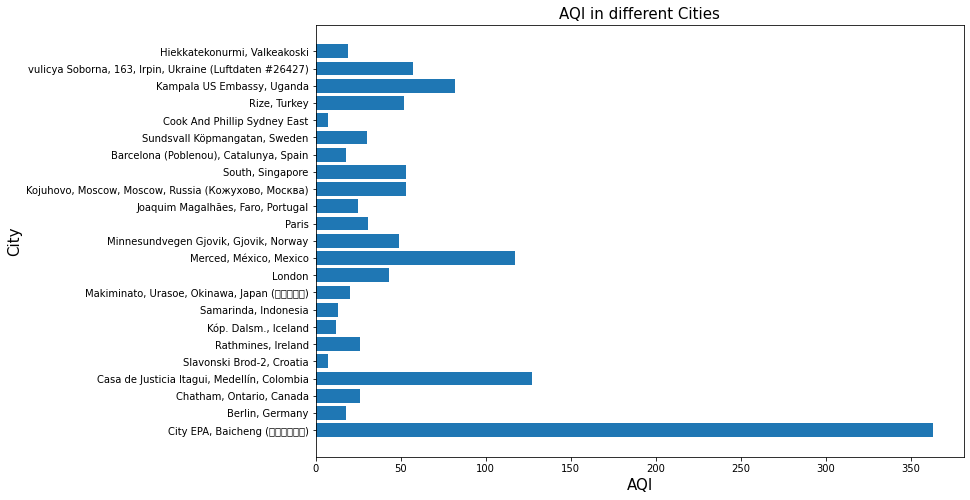

In [26]:
fig= plt.figure(figsize=(9,6))
ax = fig.add_axes([0,0,1,1])
City = clean_full_data["City"].tolist()
AQI = clean_full_data["AQI"].tolist()
ax.barh(City, AQI)
plt.title('AQI in different Cities', fontsize=15)
plt.xlabel("AQI", fontsize=15)
plt.ylabel("City", fontsize=15)
plt.show()

<P>
From the below stacked area chat, I wanted to analyse whether there is relation between PM10 and PM25 particles. Looking at the summary of the data, it is quite conclusive that PM25 majorly affects the AQI. I have concluded this though in the subsequent cells.
    
Looking at the graph, it can be somewhat said that they both exists but the proportion of PM25 in quite high than PM10.
</P>

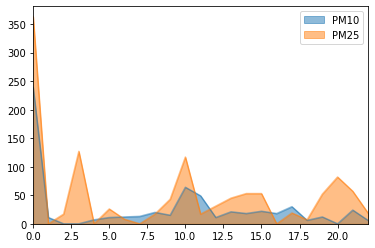

In [27]:
selected_columns = ['City', 'PM10', 'PM25']
graph_data = select_columns(clean_full_data, selected_columns)
graph_data.set_index('City')
graph_data.plot.area(stacked=False)

The below is a stacked bar graph, which shows the relation between PM25 and AQI. There are not many values in the range of approx. (200 to 550) but looking at the bars, its quite indicative that AQI is largely affected by PM25.

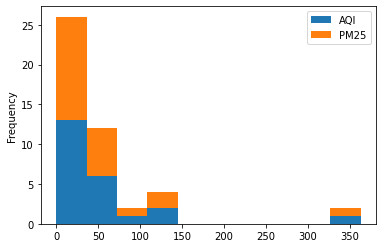

In [28]:
selected_columns = ['City', 'AQI', 'PM25']
graph_data = select_columns(clean_full_data, selected_columns)
graph_data.set_index('City')
graph_data.plot.hist(stacked=True)

As per some texts available online, O3 is largely affected by the AQI. Looking at the scatter plot below, a concrete conclusion can be made that, depending on the place, there are few places which at a lower AQI does not affect O3 neither helps in increasing the production of O3. But, at some places where the AQI, it helps in developing ozone (O3) which is natural protector that prevents UV rays from entering. 

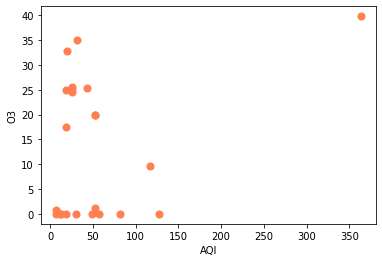

In [29]:
selected_columns = ['City', 'AQI', 'O3']
graph_data_1 = select_columns(clean_full_data, selected_columns)
graph_data_1.set_index('City')

graph_data_1.plot.scatter(x="AQI", y="O3", s=50, c='coral' )

The graph below shows the probability density of gases with respect to each other. O3 and H have a very high distribution with respect to SO2 at lower levels.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001672DC67940>,
      dtype=object)

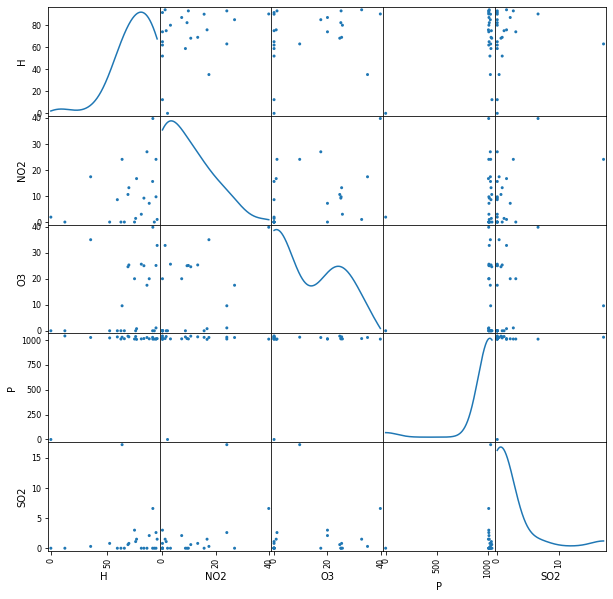

In [30]:
#KDE is a non-parametric way to estimate the probability density function of any variable we wish to view.

selected_columns = ['City', 'H', 'NO2', 'O3', 'P', 'SO2']
graph_data = select_columns(clean_full_data, selected_columns)
graph_data.set_index('City')

cmap = cm.get_cmap('gnuplot')
scatter_matrix(graph_data, alpha=1, figsize=(10, 10), diagonal='kde', cmap=cmap)

<P>
The below are the line graphs of composition of different gasses across different cities. I wanted to conclude my point of not taking an average of the gases using this plot. 

As it can be seen from SO2, most of the cities on API call didn’t gave back the value for SO2. If an average of the available values would have been taken the composition of SO2 could have affected the summary and subsequent analysis. 

To a surprise, P is a major contributor in the AQI. It is present in a high ratio across all cities. The presence of NO2 is less overall in different cities. H and O3 show a varying trend. 
</P>

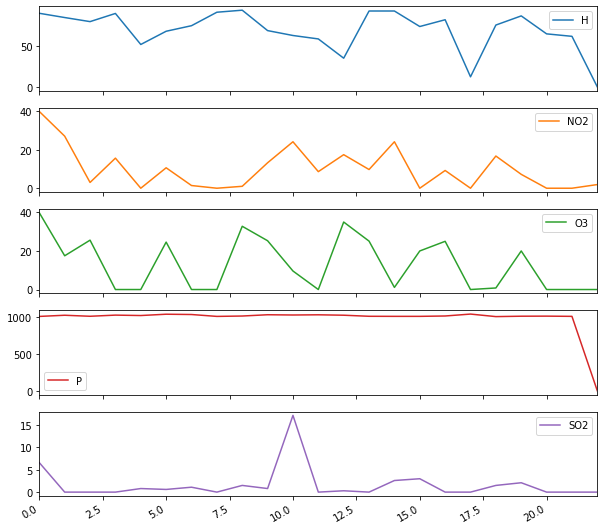

In [31]:
selected_columns = ['City', 'H', 'NO2', 'O3', 'P', 'SO2']
graph_data = select_columns(clean_full_data, selected_columns)
graph_data.set_index('City')
ax = graph_data.plot(subplots=True, figsize=(10, 10));


<P>
The labels that I defined initially in my table are used to show the percentile of air quality condition the cities are in. Pie chart is quite useful and an effective graph in such scenarios.
</P>

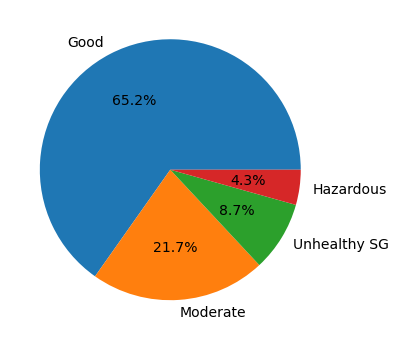

In [32]:
selected_columns = ['City', 'Labels']
graph_data = select_columns(clean_full_data, selected_columns)
graph_data.set_index('City')

label_counts = graph_data["Labels"].value_counts()
p = label_counts.plot(kind="pie", figsize=(6, 6), fontsize=14, autopct="%.1f%%")
p.set_ylabel(None);

## Final Manipulation, Exploration and Visualisation¶

<P>
In my conclusion, I chose to show the variation of PM25 with AQI and PM10 with AQI as from the above graphs, I could collect PM25 is majorly responsible to high changes in the AQI but, some concrete evidence is required. 

I have used a dual axis graph on which one side is AQI and the other has PM25, the cities are displayed on the x-axis.

Looking at the graph, it can be concluded that, PM25 is major contributor in changing the AQI across different cities.  More the PM25 particles suspended in the air, higher is the AQI. Both the lines are following almost a same trend.

Referring to the AQI and PM10, they are not very closely related to each other. Though, they PM10 contributes to AQI but, is not major as PM25.
</P>

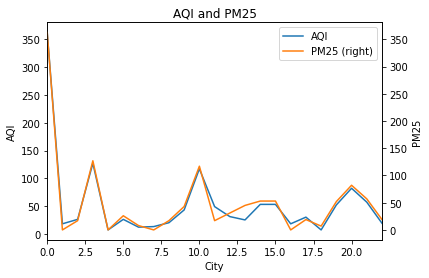

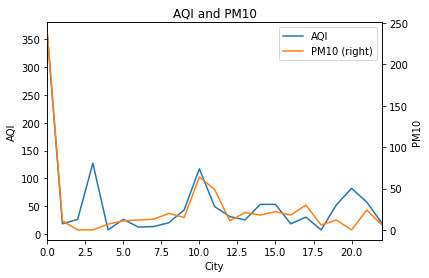

In [33]:
selected_columns = ['City', 'AQI', 'PM25']
graph_data_1 = select_columns(clean_full_data, selected_columns)
graph_data_1.set_index('City')

selected_columns_2 = ['City', 'AQI', 'PM10']
graph_data_2 = select_columns(clean_full_data, selected_columns_2)
graph_data_2.set_index('City')

ax = graph_data_1.plot(secondary_y=['PM25'])
ax.set_ylabel("AQI")
ax.set_xlabel("City")
ax.right_ax.set_ylabel("PM25")
plt.title("AQI and PM25")
plt.show()

ax = graph_data_2.plot(secondary_y=['PM10'])
ax.set_ylabel("AQI")
ax.right_ax.set_ylabel("PM10")
ax.set_xlabel("City")
plt.title("AQI and PM10")
plt.show()

<P>
Before, I present final words for the notebook.
    
I want to take a moment to show an interesting fact about the data I collected over 17 days. 

As I mentioned earlier, I have been collection data for only Delhi and PM25. As we all are aware about the current situation of CONVID-19, the governments across globe are imposing lockdowns. This lockdown has led an entire stop to the industries, factories and major sources that are responsible for air pollution.

I have provided a line graph (trend graph) below of the PM25 value in Delhi. As, I mentioned about AQI in my previous discussion, that it majorly affected by PM25, it can be applied to this graph.

Initially on the March 14 as it can be seen, the AQI index is low but suddenly experienced a spike. Delhi, India, went on a lockdown on March 24, 2020 thus, the immediate effect of lockdown can be seen on the PM25 values. It has been declining, i.e. the nature has started recovering. 

My point here is that, we as humans have taken the nature for granted and thus, AQI has gone bad. Just when we stopped everything, the nature got a moment to revive and get better. If I have to conclude on this fact, I will definitely say, nature is a precious element and must not be taken for granted.
</P>

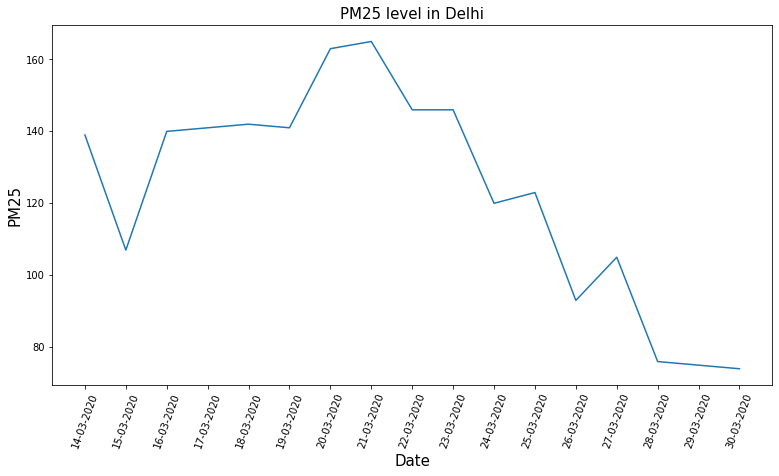

In [34]:
fig= plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
Time = data_delhi["Date"].tolist()
PM25 = data_delhi["PM25"].tolist()
ax.plot(Time, PM25)
plt.xticks(rotation=70)
plt.title('PM25 level in Delhi', fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("PM25", fontsize=15)
plt.show()

## Final Thoughts

<P>
As per the current notebook and available data, I can conclude that PM25 particles are a major contributor in increasing the AQI values. Other gases are also responsible such a H, NO2, SO2. In fact, P has high composition as compared to other gases. Further improvements can be done to this by incorporating the weather data and look how these gases act according to different weather conditions.

<I>In a nutshell, the fine (PM10 and PM25) particles suspended in air fluctuates the AQI values.</I>
</P>